In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from jupyterthemes import jtplot

jtplot.style()

In [2]:
def show_images(im_dict, cols, shape = (1,1), length = None, size = 8):
    if not length:
        length = len(im_dict)
    else:
        length = max(length, len(im_dict))
    w_size = shape[1] / sum(shape) * size
    h_size = shape[0] / sum(shape) * size
    rows = np.ceil(length / cols)
    fig = plt.figure(figsize=(w_size*cols, h_size*rows))
    i = 0
    for key, value in im_dict.items():
        i += 1
        sub = fig.add_subplot(rows, cols, i)
        sub.set_title(key)
        plt.axis('off')
        plt.imshow(value)
    return fig

In [3]:
fn = 'image.jpg' 
img = cv.imread(fn, 0) 
img = cv.resize(img, None, fx = 2, fy = 2)

ret,image = cv.threshold(img,127,255,cv.THRESH_BINARY)

row,col = image.shape
s_vs_p = 0.5
amount = 0.004
out = np.copy(image)
num_salt = np.ceil(amount * image.size * s_vs_p)
coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
out[coords] = 1
num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
out[coords] = 0

image = cv.cvtColor(image, cv.COLOR_GRAY2RGB)
salt = cv.cvtColor(out, cv.COLOR_GRAY2RGB)

blur = cv.blur(salt,(5,5))
median = cv.medianBlur(salt,3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


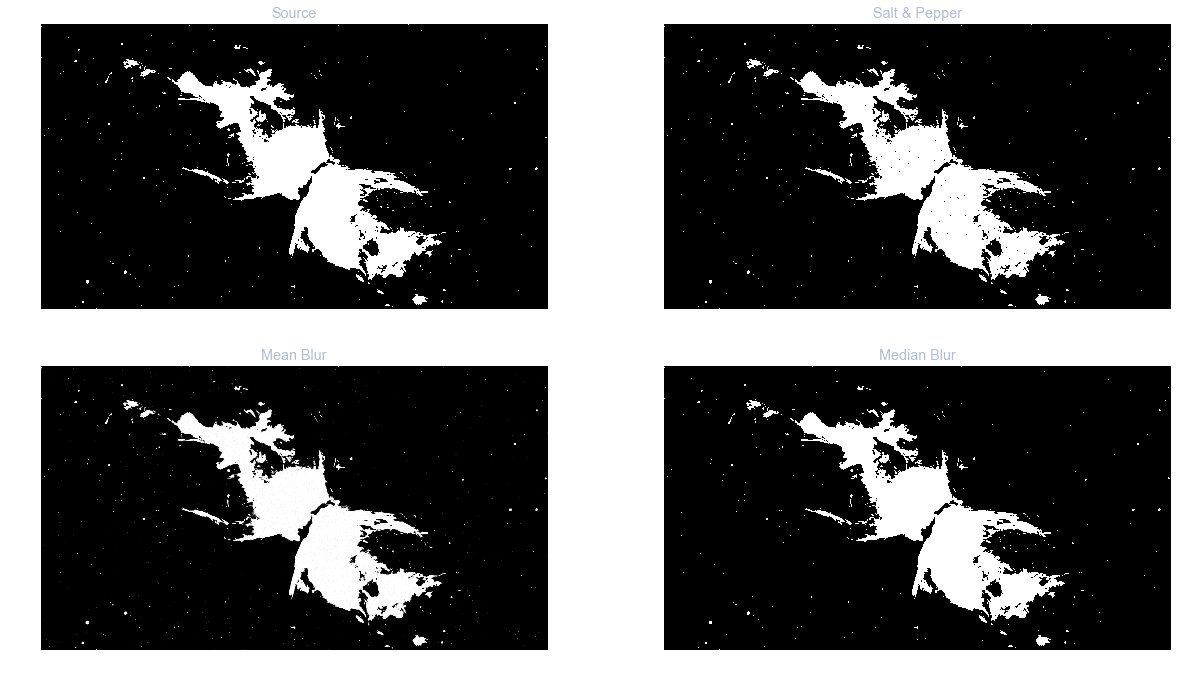

In [4]:
im_dict = {'Source':image, 'Salt & Pepper':salt, 'Mean Blur':blur, 'Median Blur':median}

cols = 2
size = 16
fig = show_images(im_dict, cols, shape = img.shape, size = size)